In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr

In [2]:
url = 'https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv'
df = pd.read_csv(url)
df.head(6)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0
5,2/22/2010,0.0,2098150.0,0.0,0.0,0.0,0.000384,0,1.0,0.0,0.000032,2.527738,0.0,0.0,65.214056,0.0,262,261,42361,261,261,32350.00,19551.0,0.0


In [3]:
#Creating matrix of features
x = df.iloc[:, 2:].values #independant variable
y = df.iloc[:, :].values #dependant variable

In [4]:
df.iloc[1023]

Date                                                     12/6/2012
btc_market_price                                           13.6888
btc_total_bitcoins                                     1.05288e+07
btc_market_cap                                         1.44126e+08
btc_trade_volume                                            718984
btc_blocks_size                                               3829
btc_avg_block_size                                        0.127314
btc_n_orphaned_blocks                                            0
btc_n_transactions_per_block                                   250
btc_median_confirmation_time                                  11.6
btc_hash_rate                                              24.4457
btc_difficulty                                         3.43891e+06
btc_miners_revenue                                         49361.8
btc_transaction_fees                                       31.0582
btc_cost_per_transaction_percent                           1.6

# Exploratary data analysis

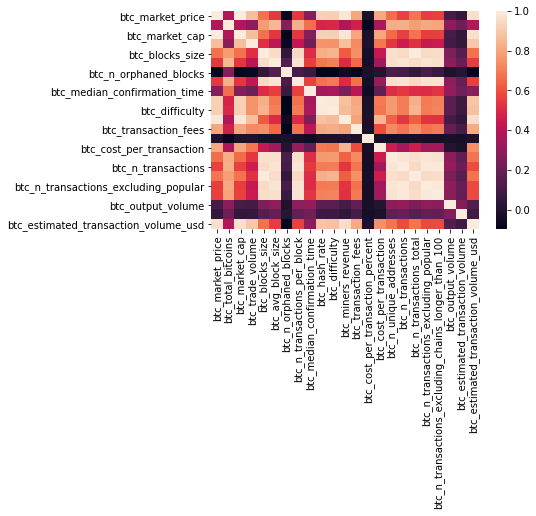

In [5]:
sns.heatmap(df.corr())

In [6]:
correlation = df.corr()
print(correlation["btc_market_price"])

btc_market_price                                       1.000000
btc_total_bitcoins                                     0.392474
btc_market_cap                                         0.999783
btc_trade_volume                                       0.868813
btc_blocks_size                                        0.674507
btc_avg_block_size                                     0.544033
btc_n_orphaned_blocks                                 -0.076400
btc_n_transactions_per_block                           0.544125
btc_median_confirmation_time                           0.275250
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_miners_revenue                                     0.986732
btc_transaction_fees                                   0.806595
btc_cost_per_transaction_percent                      -0.013517
btc_cost_per_transaction                               0.815507
btc_n_unique_addresses                  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


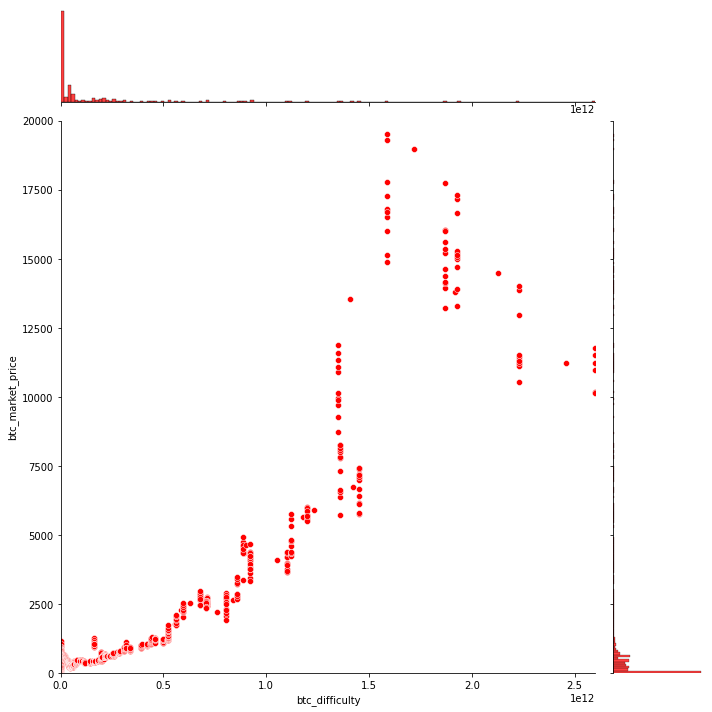

In [30]:
a = sns.jointplot( "btc_difficulty", "btc_market_price", data=df, xlim=(0, 2.6E+12), ylim=(0, 20000), color="r", size=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


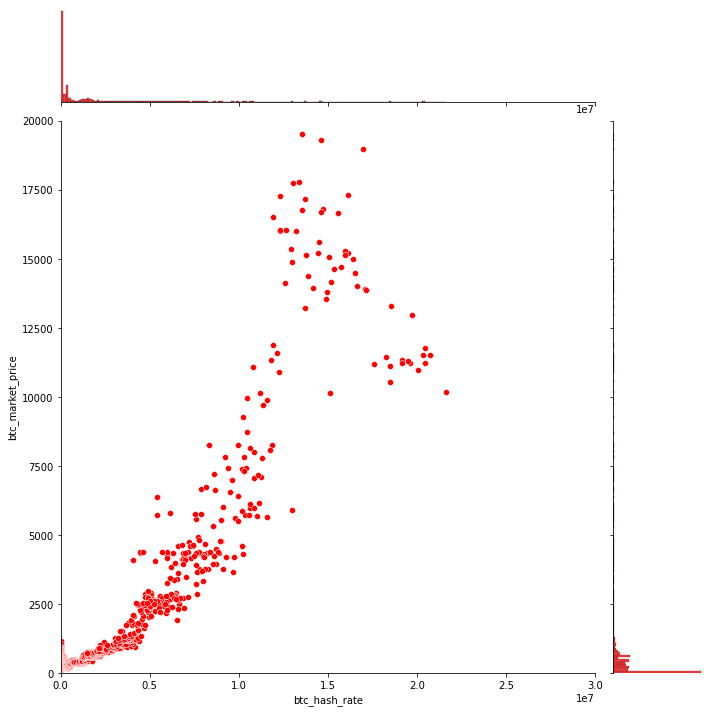

In [31]:
b = sns.jointplot( "btc_hash_rate", "btc_market_price", data=df, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


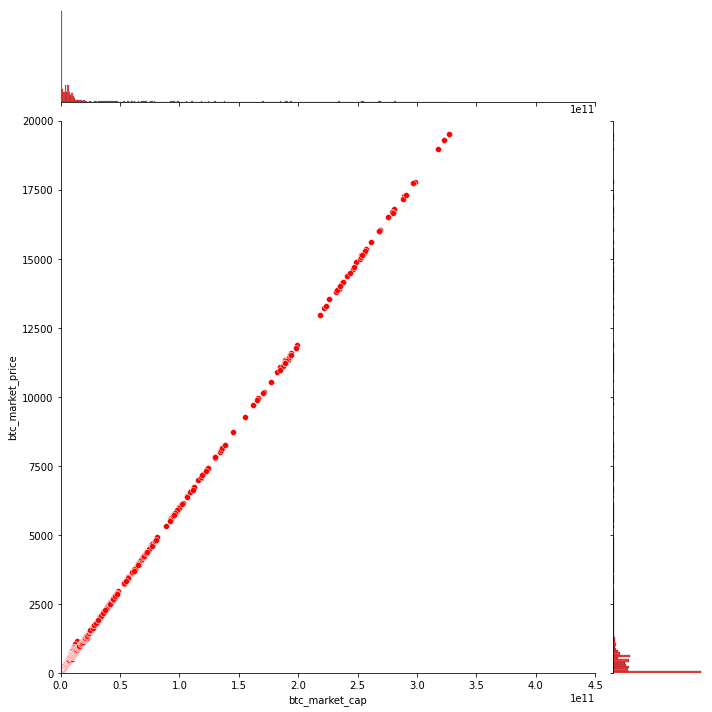

In [32]:
d = sns.jointplot("btc_market_cap", "btc_market_price", data=df, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


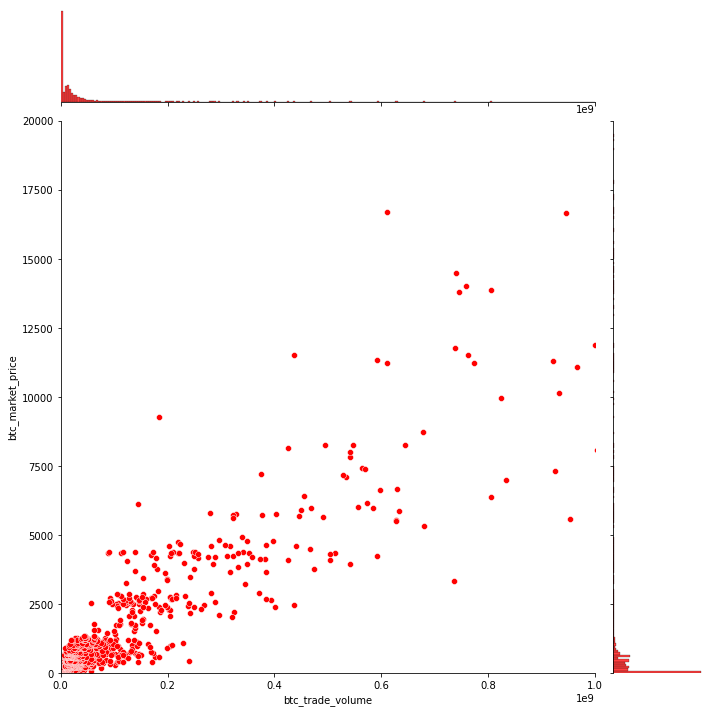

In [33]:
e = sns.jointplot("btc_trade_volume", "btc_market_price", data=df, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=10)

# Data cleaning

In [34]:
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [35]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.352154e+07,35302.697417,0.350366,0.364074,671.673651,7.501113,1.244070e+06,1.606360e+11,2.184353e+06,60.296791,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.180461e+06,3.866841e+10,2.914143e+08,43447.369304,0.353168,0.842259,689.561322,4.964264,2.924141e+06,3.714886e+11,5.669939e+06,117.557711,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,2.527738e+00,0.000000e+00,0.000000,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.536962e+06,5.363081e+07,2.968431e+05,801.500000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,1.591075e+06,4.659125e+04,9.512541,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.237281e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.900000,2.176189e+04,2.621404e+09,8.716363e+05,20.415194,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.517080e+07,8.075525e+09,2.823617e+07,57426.500000,0.676065,0.000000,1232.995223,10.150000,1.035363e+06,1.200000e+11,1.827683e+06,49.501994,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,2.600000e+12,5.319158e+07,1495.946477,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [36]:
df['btc_trade_volume'].fillna(df['btc_trade_volume'].median(),inplace = True)
df['btc_transaction_fees'].fillna(df['btc_transaction_fees'].median(),inplace = True)
df['btc_difficulty'].fillna(df['btc_difficulty'].mean(),inplace = True)
df['btc_total_bitcoins'].fillna(df['btc_total_bitcoins'].mean(),inplace = True)
df['btc_blocks_size'].fillna(df['btc_blocks_size'].median(),inplace = True)
df['btc_median_confirmation_time'].fillna(df['btc_median_confirmation_time'].mean(),inplace = True)

# Model Formulations and predictions :


In [37]:
#Creating matrix of features
x = df.iloc[:, 2:].values #independant variable
y = df.iloc[:, 1].values #dependant variable

In [38]:
#Spliting the dataset into the trainning set and test set
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state = 0)

In [39]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#Predicting the Test set results
y_pred = regressor.predict(x_test)


In [41]:
# Mean square error:
print("Mean Square Error:", mse(y_test, y_pred))

Mean Square Error: 379.480886138497
